# Part 1: How to get data on player projections
___________

### Overview
What makes daily fantasy sports (DFS) so unique compared to traditional fantasy is that you can create any number of different lineups as long as you fill the required positions and stay under the salary cap. This makes for a virtually unlimited number of combinations. In order to truly optimize your lineups you need to have accurate projections of how they are expected to perform. 

As mentioned, one of the pieces of data that I wanted to include in my database was information on player projections. I was specifically looking for data on the number of points that player was *projected* to score for that week.

After doing some research I was able to find weekly projection data on [Rotogrinders](http://rotogrinders.com/projected-stats/nfl-flex?site=draftkings). The website offers a subscription service where they provide tools and loads of statistics on players and matchups. For non-subscribers they do offer projection data, although limited, still gives me what I need.

You can get weekly projection data on every position:

- QB
- RB
- WR
- TE
- Flex
- Defense
- Kicker

Here's a screenshot of how the projection data appears on their site:

![DraftKings Projections](Desktop/Fantasy/rotogrinders.jpg)

For the purposes of this project I'm going to show you how to grab projection data from the web then do some cleaning and exploratory analysis.

## 1a: Getting the data

Looking at their site you can see they have a nice table with lots of data about the player and their projected output. You can see the information for non-subscribers is hidden, but that still leaves us with the data I originally wanted: **projected points**.

You can see they offer this data as a flat file.

If you click on **QB** and then right-click on the *Download as CSV* button, we can inspect the URL:

`https://rotogrinders.com/projected-stats/nfl-qb.csv?site=draftkings`

I did the same thing with the other positions to verify that the links were constructed the same way. The only difference is that the link changes for each position you click. Now we can grab the data for each position and combine them into a single list.

In [108]:
#Import necessary libraries
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#We're going to export this to a new .csv file later: file_name
file_name = 'player_projections_'
timestr = time.strftime("%d%%m%Y")

#Create a list that holds every URL we want data for: url
url = ['https://rotogrinders.com/projected-stats/nfl-qb.csv?site=draftkings',\
      'https://rotogrinders.com/projected-stats/nfl-rb.csv?site=draftkings',\
      'https://rotogrinders.com/projected-stats/nfl-wr.csv?site=draftkings',\
      'https://rotogrinders.com/projected-stats/nfl-te.csv?site=draftkings']

#Loop through each url, read each .csv file into a list, append all of the lists together, then concatenate the
#the lists into a single dataframe

df_list = [] #Initiate an emtpy list to hold our files: df_list

#Loop through each link
for data in url:
    df_list.append(pd.read_csv(data,header=None))

df = pd.concat(df_list,sort=False) #Concatenate our lists into a single DataFrame that we will use:df
type(df)



pandas.core.frame.DataFrame

## 1b. Exploratory data analysis

Now that our data has been loaded into a single DataFrame we should do a sanity check. We'll do that by looking at the first few rows, checking the data types, looking for missing data, and looking at some descriptive statistics.

In [97]:
#Inspect the first 10 rows
df.head(10)

,0,1,2,3,4,5,6,7
0,Baker Mayfield,5400,CLE,QB,ATL,30.18435,9.81225,18.69
1,Philip Rivers,6000,LAC,QB,OAK,35.52660,12.41238,21.93
2,Matt Ryan,6100,ATL,QB,CLE,31.57110,9.12054,21.26
3,Marcus Mariota,5500,TEN,QB,NEP,31.16288,9.89184,17.92
4,Andy Dalton,5000,CIN,QB,NOS,30.70400,9.99799,19.19
5,Tom Brady,6000,NEP,QB,TEN,31.55360,10.35840,20.80
6,Derek Carr,4700,OAK,QB,LAC,27.68381,9.58485,17.27
7,Russell Wilson,5700,SEA,QB,LAR,31.63552,10.65556,19.48
8,Eli Manning,5200,NYG,QB,SFO,29.22295,8.98890,18.05
9,Nick Mullens,5200,SFO,QB,NYG,32.08542,10.28424,17.61


In [98]:
#Check the shape, data types, and check for missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 66
Data columns (total 8 columns):
0    303 non-null object
1    303 non-null int64
2    303 non-null object
3    303 non-null object
4    303 non-null object
5    303 non-null float64
6    303 non-null float64
7    303 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.3+ KB


This looks to have loaded everything. Each observation in the dataset corresponds to projection data for a single player for a single game that week. Our dataset is made up of 303 rows x 8 columns and the data types are correct. Player names, their position, current team and opponent are all loaded as strings while their salary and projected ceiling, floor, and total points were loaded as numeric data.

Let's add column headers get a frequency count by position to see how many unique projections there are for each position in the dataset.

In [99]:
#Add column headers
df.columns = ['PlayerName','DkSalary','TeamID','Position','OpponentID','Ceiling','Floor','Points']
df.columns

Index(['PlayerName', 'DkSalary', 'TeamID', 'Position', 'OpponentID', 'Ceiling',
       'Floor', 'Points'],
      dtype='object')

In [100]:
#Get frequency counts by Position
df.Position.value_counts()

WR    124
RB     84
TE     67
QB     28
Name: Position, dtype: int64

In [101]:
# Lastly we calculate our descriptive statistics
df.describe()

,DkSalary,Ceiling,Floor,Points
count,303.000000,303.000000,303.000000,303.000000
mean,4150.165017,16.294768,6.709648,8.870957
std,1536.010886,10.786406,3.774750,6.391902
min,2500.000000,0.740000,0.567000,0.630000
25%,3000.000000,7.036480,3.520000,3.520000
50%,3600.000000,15.972010,7.167030,7.990000
75%,5000.000000,24.337825,9.362645,12.680000
max,9400.000000,45.847620,17.073900,27.990000


This gives us a lot of great information. Here are my initial reactions to the data:

 - There is a huge range in salaries, starting at 2.5k and ending at 9.4K
 - The upper quartile indicates that 75% of players are projected to score less than 12.7 points this week
 - I'd like to understand if there is any correlation between salary and points. More specificlly I wouldlike to understand if an increase in salary correlates to an increase in projected points.

### Visualizing the dataset

Question 1: **Is there a large difference in projected points across positions?**

Text(0.5,1,'Projected Points by Position')

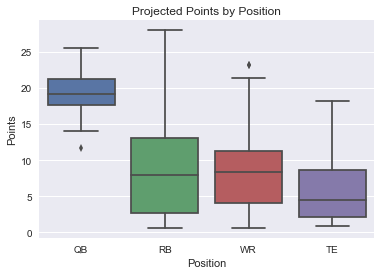

In [79]:
#Create a boxplot to compare Points across the different values for position
sns.set()
sns.boxplot(x='Position',y='Points',data=df)
plt.suptitle("") #Remove the title that is autogenerated by Pandas
plt.title('Projected Points by Position') #Add a title

Looks like the projected points among running backs are more variable than the positions. Quarterbacks have the smallest spread, ranging between 14 and 26 points. About 75% of the projected points for Tight Ends fall 9 points.

Question 2: **Is there a correlation between salary and points?**

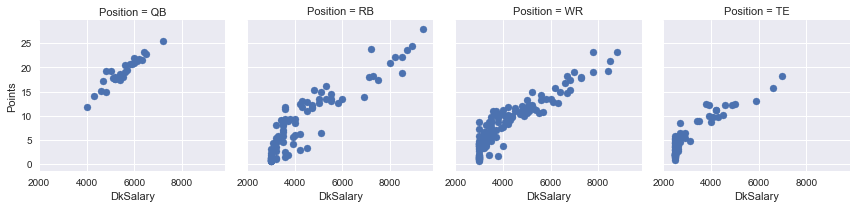

In [102]:
#Create a scatterplot to visualize the relationship between salary and points for each position
g = sns.FacetGrid(df,col='Position')
g.map(plt.scatter,'DkSalary',"Points")

There is certainly a strong positive relationship between Salary and Points. As the Salary increases the Points increase as well. In order to quantify the strength of the linear relationship we would have to compute a correlation analysis which goes beyond the scope of this project.

## 1c. Cleaning the dataset

Overall the dataset is pretty clean. The data types are accurate, we're not missing any data, and we now have column headers that identify all of our variables. We would still like to do a few things:

- Add a column that stores the date that this information was collected
- Calculate the players expected value and insert it as a new column 

### Add columns for today's date

In [103]:
df['DateAdded']=pd.to_datetime('today').strftime("%m/%d/%Y")
df.head()

,PlayerName,DkSalary,TeamID,Position,OpponentID,Ceiling,Floor,Points,DateAdded
0,Baker Mayfield,5400,CLE,QB,ATL,30.18435,9.81225,18.69,11/12/2018
1,Philip Rivers,6000,LAC,QB,OAK,35.52660,12.41238,21.93,11/12/2018
2,Matt Ryan,6100,ATL,QB,CLE,31.57110,9.12054,21.26,11/12/2018
3,Marcus Mariota,5500,TEN,QB,NEP,31.16288,9.89184,17.92,11/12/2018
4,Andy Dalton,5000,CIN,QB,NOS,30.70400,9.99799,19.19,11/12/2018


### Add column that shows the players value based on their projected points

We're going to compute the H-Value for each player which is described as the following:

> H-Value combines overall value (points per dollar) and projected points in a novel formula that provides an accurate ranking of the top overall plays each week. Simply sorting the players by H-Value provides an easy ranking system, and the player with highest H-Value is the single strongest play of the week.
    -*Dan Hindrey*, [FootballGuys](https://subscribers.footballguys.com/apps/article.php?article=Draftkings_Book_H_Value_2015)

![Value](http://latex.codecogs.com/gif.latex?H_Value%20%3D%20%5Cfrac%7BPoints%20*%20%5Csqrt%7B3%7D%7D%7BSalary%7D%20*%202000)

In [104]:
#Add new column that calculates a players H_Value and print the first 5 rows

df['H_Value'] = df.Points * np.sqrt(3) / df.DkSalary * 2000
df.head()

,PlayerName,DkSalary,TeamID,Position,OpponentID,Ceiling,Floor,Points,DateAdded,H_Value
0,Baker Mayfield,5400,CLE,QB,ATL,30.18435,9.81225,18.69,11/12/2018,11.989641
1,Philip Rivers,6000,LAC,QB,OAK,35.52660,12.41238,21.93,11/12/2018,12.661291
2,Matt Ryan,6100,ATL,QB,CLE,31.57110,9.12054,21.26,11/12/2018,12.073246
3,Marcus Mariota,5500,TEN,QB,NEP,31.16288,9.89184,17.92,11/12/2018,11.286673
4,Andy Dalton,5000,CIN,QB,NOS,30.70400,9.99799,19.19,11/12/2018,13.295222


Let's sort our dataframe to see who the highest valued players are for this week

In [105]:
#Sort H_VALUE in descending order and print the Top 25 players for the week

df.sort_values(by='H_Value',ascending=False).head(10)

,PlayerName,DkSalary,TeamID,Position,OpponentID,Ceiling,Floor,Points,DateAdded,H_Value
23,Alex Smith,4800,WAS,QB,TBB,28.22400,7.87200,19.20,11/12/2018,13.856406
4,Andy Dalton,5000,CIN,QB,NOS,30.70400,9.99799,19.19,11/12/2018,13.295222
6,Derek Carr,4700,OAK,QB,LAC,27.68381,9.58485,17.27,11/12/2018,12.728731
1,Philip Rivers,6000,LAC,QB,OAK,35.52660,12.41238,21.93,11/12/2018,12.661291
14,Ryan Fitzpatrick,5600,TBB,QB,WAS,34.06800,11.64840,20.40,11/12/2018,12.619227
17,Aaron Rodgers,6400,GBP,QB,MIA,33.16170,10.52826,23.19,11/12/2018,12.551956
19,Ben Roethlisberger,5800,PIT,QB,CAR,31.51368,10.06860,20.76,11/12/2018,12.399095
16,Patrick Mahomes,7200,KCC,QB,ARI,42.80578,15.61212,25.51,11/12/2018,12.273504
12,Jared Goff,6100,LAR,QB,SEA,33.14390,9.82680,21.55,11/12/2018,12.237933
27,Cam Newton,6200,CAR,QB,PIT,34.27922,11.80462,21.82,11/12/2018,12.191403


## 1d. Wrapping up

At this point in the project we've accomplished the following:

 - Pulled data from the web
 - Loaded the data into a DataFrame
 - Conducted exploratory data analysis
 - Taken basic steps to clean the dataset

The last step to export the data as a .csv file. In future projects i'll demonstrate how to load a DataFrame directly into an existing database table.

In [111]:
#Export DataFrame to a .csv file
df.to_csv(file_name + timestr + '.csv')